<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/DataCleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaining Data


Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is
around 10%
. This might not sound like a lot, but in September 2022 alone UK consumers borrowed
around £1.5 billion
, which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported.

They have supplied you with a csv file called **"bank_marketing.csv"**, which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

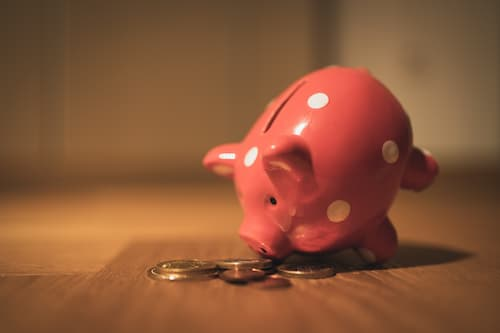

In [1]:
# Start coding...
import pandas as pd
import numpy as np

# Read in csv
marketing = pd.read_csv("bank_marketing.csv")

# Split into the three tables
client = marketing[["client_id", "age", "job", "marital",
                    "education", "credit_default", "mortgage"]]
campaign = marketing[["client_id", "number_contacts", "month", "day",
               "contact_duration", "previous_campaign_contacts", "previous_outcome", "campaign_outcome"]]
economics = marketing[["client_id", "cons_price_idx", "euribor_three_months"]]

## Editing the client dataset
# Clean education column
client["education"] = client["education"].str.replace(".", "_")
client["education"] = client["education"].replace("unknown", np.NaN)

# Clean job column
client["job"] = client["job"].str.replace(".", "_")

# Clean and convert client columns to bool data type
for col in ["credit_default", "mortgage"]:
  client[col] = client[col].map({"yes": 1,
                                 "no": 0,
                                 "unknown": 0})
  client[col] = client[col].astype(bool)

# Editing the campaign dataset
# Change campaign_outcome to binary values
campaign["campaign_outcome"] = campaign["campaign_outcome"].map({"yes": 1,
                                                                 "no": 0})

# Convert previous_outcome to binary values
campaign["previous_outcome"] = campaign["previous_outcome"].map({"success": 1,
                                                                 "failure": 0,
                                                                 "nonexistent": 0})

# Add year column
campaign["year"] = "2022"

# Convert day to string
campaign["day"] = campaign["day"].astype(str)

# Add last_contact_date column
campaign["last_contact_date"] = campaign["year"] + "-" + campaign["month"] + "-" + campaign["day"]

# Convert to datetime
campaign["last_contact_date"] = pd.to_datetime(campaign["last_contact_date"],
                                               format="%Y-%b-%d")

# Clean and convert outcome columns to bool
for col in ["campaign_outcome", "previous_outcome"]:
  campaign[col] = campaign[col].astype(bool)

# Drop unneccessary columns
campaign.drop(columns=["month", "day", "year"], inplace=True)

# Save tables to individual csv files
client.to_csv("client.csv", index=False)
campaign.to_csv("campaign.csv", index=False)
economics.to_csv("economics.csv", index=False)

<ipython-input-1-c92db8dfd796>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].str.replace(".", "_")
<ipython-input-1-c92db8dfd796>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].replace("unknown", np.NaN)
<ipython-input-1-c92db8dfd796>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat